In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import rasterio as rio

In [2]:
import xarray as xr

In [4]:
ig = "/data/private/GPM/DEM/UK_Dem_Cop.tif"

In [5]:
# Image.MAX_IMAGE_PIXELS = None

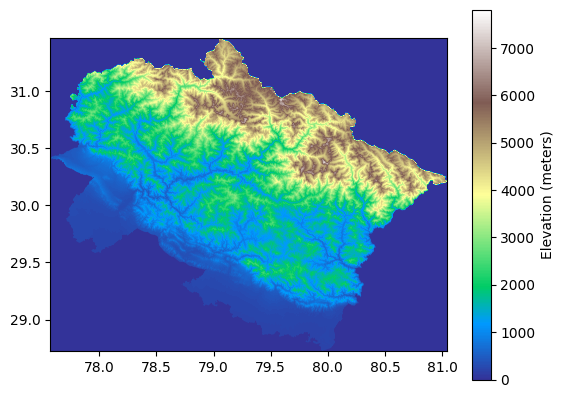

In [6]:
with rio.open(ig) as src:
    dem = src.read(1)
    dem_extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
    plt.imshow(dem, cmap='terrain', extent = dem_extent)
    plt.colorbar(label='Elevation (meters)')
    plt.show()

In [1]:
                ####### Removing the 0 values from the DEM #######

In [5]:
with rio.open(ig) as src:
    dem = src.read(1)  # Read the first band
    dem_transform = src.transform
    dem_crs = src.crs

    # Get the coordinates
    rows, cols = np.indices(dem.shape)
    xs, ys = rio.transform.xy(dem_transform, rows, cols)
    
    # Flatten the arrays and filter out the 0 values
    flat_xs = np.array(xs).flatten()
    flat_ys = np.array(ys).flatten()
    flat_dem = dem.flatten()

    # Create a DataFrame
    df = pd.DataFrame({
        'x': flat_xs,
        'y': flat_ys,
        'elevation': flat_dem
    })

    # Remove all the 0 elevation values
    df_dem = df[df['elevation'] != 0]

# Display the first few rows of the DataFrame

In [6]:
df_dem = df_dem.rename(columns= {"x" : "Longitude", "y" : "Latitude", "elevation" : "Elevation"})

In [7]:
df_dem["Elevation"] = pd.to_numeric(df_dem["Elevation"])

In [8]:
df_dem['Elevation'] = np.round(df_dem['Elevation'], 2)

In [9]:
df_dem =df_dem.round({"Longitude" :3, "Latitude" :3})

In [11]:
df_dem['Elevation']

5365         5198.279785
5366         5206.609863
5367         5221.160156
5368         5239.490234
5369         5252.450195
                ...     
123243435     199.669998
123243436     204.160004
123255933     208.639999
123255934     207.009995
123255935     201.660004
Name: Elevation, Length: 64828882, dtype: float32

In [10]:
df_dem_cop = df_dem

In [11]:
df_dem_cop1 = df_dem

In [12]:
df_dem_cop1["elevation_m"] = float('nan')

In [46]:
  ###### Mean calculation of Elevation for all elevations with same Lat and Lon in a Loop ######

In [ ]:
for index, group in df_dem_cop.groupby(["Longitude","Latitude"]):
    Longitude, Latitude = index
    avg_elv  = group["Elevation"].mean()
    df_dem_cop.loc[(df_dem["Longitude"] == Longitude) & (df_dem["Latitude"] == Latitude), "Elevation"] = avg_elv

In [47]:
    ####### Looping taking time so doing it using the merge function #######

In [14]:
# Group by 'lat' and 'lon', calculate the mean elevation for each group
grouped_df = df_dem_cop1.groupby(['Longitude', 'Latitude'], as_index = False)["Elevation"].mean()

# Merge the original DataFrame with the grouped DataFrame on 'lat' and 'lon' columns
df_dem_cop1 = pd.merge(df_dem_cop1, grouped_df, on=['Longitude', 'Latitude'], suffixes=('', '_mean'), how='left')

# Update the 'elevation' column with the mean elevation
df_dem_cop1['Elevation'] = df_dem_cop1['elevation_m']

# Drop the redundant columns
df_dem_cop1.drop(columns=['elevation_m'], inplace=True)

In [17]:
df_dem_cop1.drop_duplicates(subset = ["Longitude", "Latitude", "Elevation_mean"], inplace = True)

In [40]:
dem_df_1 = df_dem_cop1.rename(columns= {"Elevation_mean" : "elevation"})

In [42]:
dem_df_1 = df_dem_cop1.drop(columns = ["Elevation"])

In [29]:
# dem_df_1.drop(columns = ["Elevation"],  inplace = True)

In [73]:
dem_df_1["Elevation_mean"].max()

7790.78759765625

In [79]:
dem_df_1.columns

Index(['Longitude', 'Latitude', 'Elevation_mean'], dtype='object')

In [80]:
dem_df_1.index = range(1, len(dem_df_1) + 1)

In [9]:
dem_df_1.to_csv("/data/private/GPM/DEM/Modified_Dem_df.csv", index = False)

NameError: name 'dem_df_1' is not defined

In [3]:
elev = pd.read_csv("/data/private/GPM/DEM/Modified_Dem_df.csv")
dem_df_1 = pd.DataFrame(elev)

In [30]:
rf_jul = "/data/private/GPM/Data_All/Combined Data_2023/July_all.csv"
rf_25 =  "/data/private/GPM/Data_1/25th_July_23.csv"
import pandas as pd
import os

# List of file paths
fps = [
    "/data/private/GPM/Data_All/26th_July_23.csv",
    "/data/private/GPM/Data_All/27th_July_23.csv",
    "/data/private/GPM/Data_All/28th_July_23.csv",
    "/data/private/GPM/Data_All/29th_July_23.csv",
    "/data/private/GPM/Data_All/30th_July_23.csv",
    "/data/private/GPM/Data_All/31th_July_23.csv"
]



In [9]:
q = "/data/private/GPM/Data_All/26th_July_23.csv"
dq = pd.read_csv(q)
dq.head()

,S NO.,STATE,DISTRICT,STATION,TYPE,DATE(YYYY-MM-DD),TIME(UTC),RAINFALL DAILY CUMULATIVE (0.5 mm or more),Latitude,Longitude
0,1,UTTARAKHAND,ALMORA,BHAINSIYA CHHANA _UKG,AWS,2023-07-26,03:00:00,27.0,29.7003,79.8826
1,2,UTTARAKHAND,ALMORA,CHAUKHUTIYA_UKG,AWS,2023-07-26,03:00:00,10.5,29.8844,79.3502
2,3,UTTARAKHAND,ALMORA,DWARHAT_UKG,AWS,2023-07-26,03:00:00,49.5,29.7795,79.4315
3,4,UTTARAKHAND,ALMORA,JAGESHWAR_UKG,AWS,2023-07-26,03:00:00,5.5,29.6381,79.8527
4,5,UTTARAKHAND,ALMORA,SITLAKHET_UKG,AWS,2023-07-26,03:00:00,8.0,29.5940,79.5442


In [12]:
jul_df= pd.read_csv(rf_jul)

In [13]:
jul_df = jul_df.round({"Longitude" :3, "Latitude" :3})

In [14]:
df_25 = pd.read_csv(rf_25)
df_25 = df_25.round({"Longitude" :3, "Latitude" :3})

In [31]:

# Function to generate new file names
def generate_new_filename(fp):
    dir_name = os.path.dirname(fp)
    base_name = os.path.basename(fp)
    new_base_name = "processed_" + base_name
    return os.path.join(dir_name, new_base_name)

# Loop through each file path
for fp in fps:
    df = pd.read_csv(fp)
    df = df.round({"Longitude": 3, "Latitude": 3})
    new_file_path = generate_new_filename(fp)
    df.to_csv(new_file_path, index=False)
    

# Optionally, if you need to store all dataframes in a list:
df_jl = [pd.read_csv(fp).round({"Longitude": 3, "Latitude": 3}) for fp in fps]

# Save each dataframe with a new filename
for df, fp in zip(df_jl, fps):
    new_file_path = generate_new_filename(fp)
    df.to_csv(new_file_path, index=False)
    

In [18]:
df_jl[3]

,S NO.,STATE,DISTRICT,STATION,TYPE,DATE(YYYY-MM-DD),TIME(UTC),RAINFALL DAILY CUMULATIVE (0.5 mm or more),Latitude,Longitude
0,1,UTTARAKHAND,ALMORA,BHAINSIYA CHHANA _UKG,AWS,2023-07-29,03:00:00,2.0,29.700,79.883
1,2,UTTARAKHAND,ALMORA,BHIKIYASAIN_UKG,AWS,2023-07-29,03:00:00,45.5,29.696,79.269
2,3,UTTARAKHAND,ALMORA,CHAUKHUTIYA_UKG,AWS,2023-07-29,03:00:00,14.0,29.884,79.350
3,4,UTTARAKHAND,ALMORA,DWARHAT_UKG,AWS,2023-07-29,02:45:00,8.5,29.780,79.432
4,5,UTTARAKHAND,ALMORA,JAGESHWAR_UKG,AWS,2023-07-29,03:00:00,6.0,29.638,79.853
...,...,...,...,...,...,...,...,...,...,...
82,83,UTTARAKHAND,UTTARKASHI,JAN KI CHATTI_UKG,AWS,2023-07-29,03:00:00,31.0,30.978,78.441
83,84,UTTARAKHAND,UTTARKASHI,MORI _UKG,AWS,2023-07-29,03:00:00,18.5,31.021,78.047
84,85,UTTARAKHAND,UTTARKASHI,NAUGAON_UKG,AWS,2023-07-29,03:00:00,1.0,30.787,78.139
85,86,UTTARAKHAND,UTTARKASHI,RAJGARHI_UKG,AWS,2023-07-29,03:00:00,5.0,30.840,78.241


In [124]:
                 ####### Adding the Elevation from the DEM_Df to July_Df ########

In [24]:
df_jl['Elevation'] = pd.NA

# Loop through rows of rfjul_df
for i in range(len(df_jl)):
    lon_rf = df_jl.at[i, 'Longitude']
    lat_rf = df_jl.at[i, 'Latitude']
    
    # Filter result DataFrame based on matching Longitude and Latitude
    d = dem_df_1[(dem_df_1['Longitude'] == lon_rf) & (dem_df_1['Latitude'] == lat_rf)]
    
    # If matching rows found, update 'Elevation' in rfjul_df
    if not d.empty:
        df_jl.at[i, 'Elevation'] = d.iloc[0]['Elevation_mean']

TypeError: list indices must be integers or slices, not str

In [122]:
jul_df.to_csv("/data/private/GPM/Data_All/July_with_elev.csv", index  = False)

In [120]:
df_25['Elevation'] = pd.NA

# Loop through rows of rfjul_df
for i in range(len(df_25)):
    lon_rf = df_25.at[i, 'Longitude']
    lat_rf = df_25.at[i, 'Latitude']
    
    # Filter result DataFrame based on matching Longitude and Latitude
    d = dem_df_1[(dem_df_1['Longitude'] == lon_rf) & (dem_df_1['Latitude'] == lat_rf)]
    
    # If matching rows found, update 'Elevation' in rfjul_df
    if not d.empty:
        df_25.at[i, 'Elevation'] = d.iloc[0]['Elevation_mean']

In [123]:
df_25.to_csv("/data/private/GPM/Data_All/25July_with_elev.csv", index = False)

In [36]:

# Function to add elevation to a single DataFrame
def add_elevation(df, dem_df_1):
    df['Elevation'] = pd.NA
    for i in range(len(df)):
        lon_rf = df.at[i, 'Longitude']
        lat_rf = df.at[i, 'Latitude']

        # Filter result DataFrame based on matching Longitude and Latitude
        d = dem_df_1[(dem_df_1['Longitude'] == lon_rf) & (dem_df_1['Latitude'] == lat_rf)]

        # If matching rows found, update 'Elevation' in df
        if not d.empty:
            df.at[i, 'Elevation'] = d.iloc[0]['Elevation_mean']
    return df

# Apply the function to all DataFrames in the list
df_jl = [add_elevation(df, dem_df_1) for df in df_jl]

# Optionally, save the updated DataFrames to new CSV files
for idx, df in enumerate(df_jl, start=1):
    df.to_csv(f"/data/private/GPM/Data_All/processed_{idx}_July_23.csv", index=False)
    print(f"Processed file saved as /data/private/GPM/Data_All/processed_{idx}_July_23.csv")

Processed file saved as /data/private/GPM/Data_All/processed_1_July_23.csv
Processed file saved as /data/private/GPM/Data_All/processed_2_July_23.csv
Processed file saved as /data/private/GPM/Data_All/processed_3_July_23.csv
Processed file saved as /data/private/GPM/Data_All/processed_4_July_23.csv
Processed file saved as /data/private/GPM/Data_All/processed_5_July_23.csv
Processed file saved as /data/private/GPM/Data_All/processed_6_July_23.csv


In [37]:
fpp = [
    "/data/private/GPM/Data_All/processed_26_July_23.csv",
    "/data/private/GPM/Data_All/processed_27_July_23.csv",
    "/data/private/GPM/Data_All/processed_28_July_23.csv",
    "/data/private/GPM/Data_All/processed_29_July_23.csv",
    "/data/private/GPM/Data_All/processed_30_July_23.csv",
    "/data/private/GPM/Data_All/processed_31_July_23.csv"
]

In [38]:
# Loop through each file path
for fp in fpp:
    df1 = pd.read_csv(fp)
    
    # Remove rows where rainfall is more than 200 and re-index
    df1 = df1[df1['RAINFALL DAILY CUMULATIVE (0.5 mm or more)'] <= 200].reset_index(drop=True)
    
    # Round the elevation data to 2 decimal places
    if 'Elevation' in df1.columns:
        df1['Elevation'] = df1['Elevation'].round(2)
    
    # Save the processed data back to the same file
    df1.to_csv(fp, index=False)